In [126]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [127]:
# Carregar o arquivo CSV
RESULT_PATH = '/home/luiz/repos/tcc_experiments_az_ml/results/metric_results.csv'
df = pd.read_csv(RESULT_PATH)

In [128]:
df.sort_values(by=['Quantidade de Features', 'Acurácia'], ascending=[True, False]).groupby('Quantidade de Features').first()

,Seletor,Modelo,Acurácia,F1 Score,Precision,Recall
Quantidade de Features,,,,,,
5,GINI,RandomForestClassifier,0.970795,0.970578,0.970446,0.970795
10,GINI,RandomForestClassifier,0.984693,0.984651,0.984621,0.984693
50,GINI,RandomForestClassifier,0.991654,0.991644,0.991636,0.991654
75,GINI,RandomForestClassifier,0.992200,0.992197,0.992194,0.992200
100,GINI,RandomForestClassifier,0.992607,0.992603,0.992599,0.992607
150,GINI,RandomForestClassifier,0.992924,0.992922,0.992919,0.992924
200,GINI,RandomForestClassifier,0.993153,0.993152,0.993151,0.993153
300,GINI,RandomForestClassifier,0.993267,0.993264,0.993261,0.993267
399,GINI,RandomForestClassifier,0.993305,0.993303,0.993301,0.993305


In [129]:
df.loc[df["Seletor"]=="GINI", "Seletor"] = "Índice de Gini"
df.loc[df["Seletor"]=="INFOGAIN", "Seletor"] = "Infogain"
df.loc[df["Seletor"]=="PEARSON", "Seletor"] = "Corr. Pearson"
df.loc[df["Seletor"]=="SPEARMAN", "Seletor"] = "Corr. Spearman"

In [130]:
df.loc[df["Modelo"]=="RandomForestClassifier", "Modelo"] = "Random Forest"
df.loc[df["Modelo"]=="SVC", "Modelo"] = "SVC"
df.loc[df["Modelo"]=="GaussianNB", "Modelo"] = "Gaussian Naive Bayes"
df.loc[df["Modelo"]=="MultGaussianNB", "Modelo"] = "Multnomial Naive Bayes"
df.loc[df["Modelo"]=="XGBoost", "Modelo"] = "XGBoost"
df.loc[df["Modelo"]=="GradientBoostingClassifier", "Modelo"] = "Gradient Boosting"

In [131]:
MODELS = ['Random Forest', 'SVC', 'Gaussian Naive Bayes', 'Multnomial Naive Bayes', 'XGBoost', 'Gradient Boosting']
SELECTORS = ['Índice de Gini', 'Infogain', 'Corr. Pearson', 'Corr. Spearman']

In [132]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

In [133]:
def plot_selector_by_models(df, title):
    sns.set_theme(style="whitegrid")
    f, ax = plt.subplots(figsize=(8.5,7.5))

    ax = sns.lineplot(
            data=df, 
            x='Quantidade de Features', 
            y='Acurácia', 
            hue='Modelo',
        )
        
    ax.set(
        title=title,
        ylim=(0.25, 1.0), 
        ylabel='Acurácia', 
        xlabel='Número de features')

    ax.set_xticks([5, 10, 50, 75, 100, 150, 200, 300, 399])

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



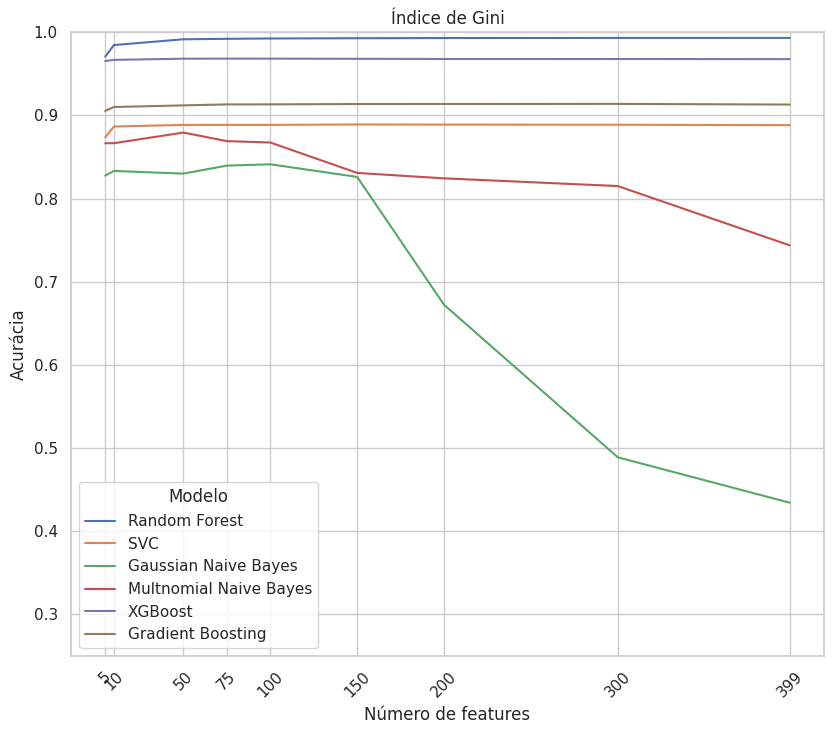

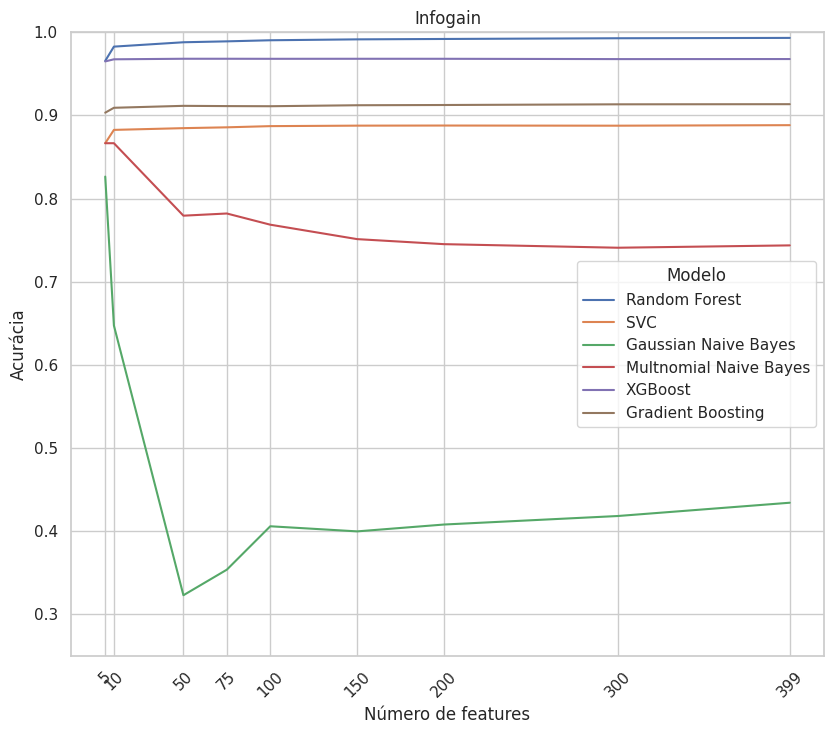

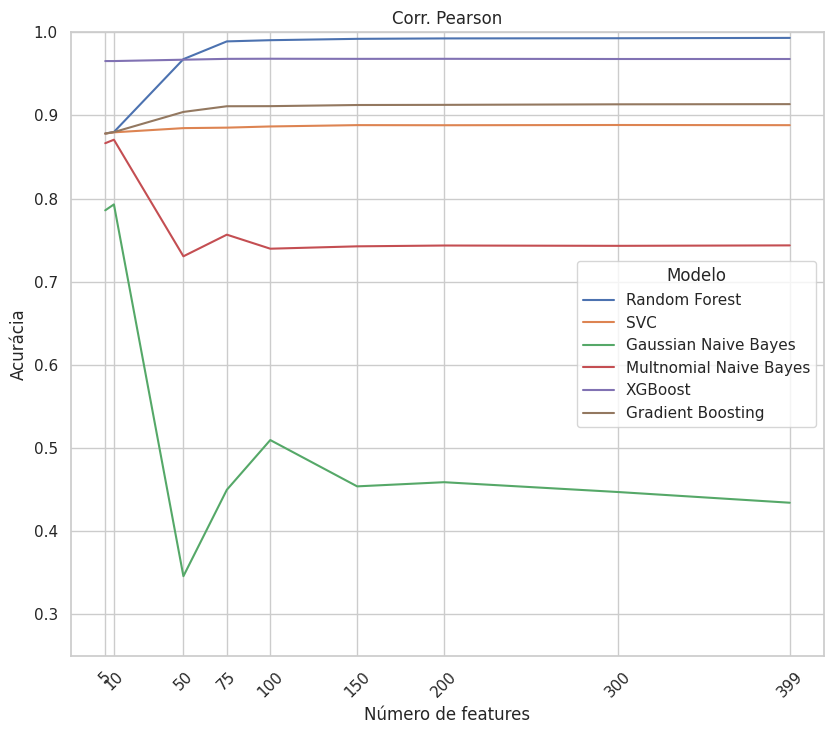

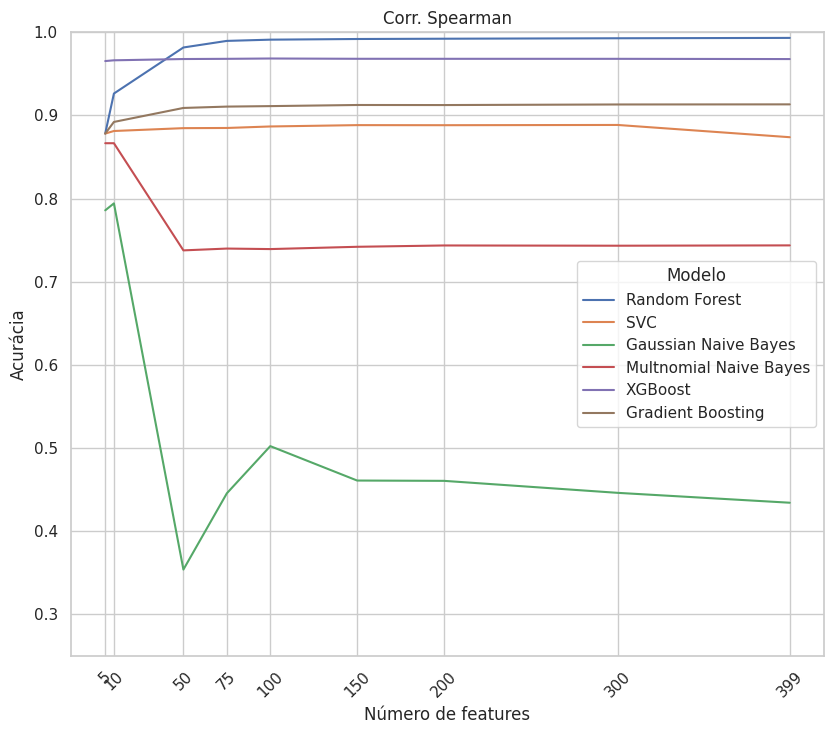

In [134]:
for selector in SELECTORS:
    plot_selector_by_models(df[df['Seletor']==selector], selector)